In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import fsolve
import math
from sympy import nsolve

## Введение в аналитическую геометрию

### 1. Задание

**Даны два вектора в трехмерном пространстве: (10,10,10) и (0,0,-10)<br>**
* **Найдите их сумму. (на листочке)<br>**
* **Напишите код на Python, реализующий расчет длины вектора, заданного его координатами. (в программе)**

In [19]:
a = np.array([10,10,10])
b = np.array([0,0,-10])
c = np.array([a[0]+b[0],a[1]+b[1],a[2]+b[2]])
c

array([10, 10,  0])

In [231]:
def vect_len(v):
    res = 0
    for i in v:
        res += i ** 2
    res = np.sqrt(res)
    return res
vect_len(a)

17.320508075688775

### 2. Задание

**Задание (на листочке)<br>**
**Почему прямые не кажутся перпендикулярными?**<br>

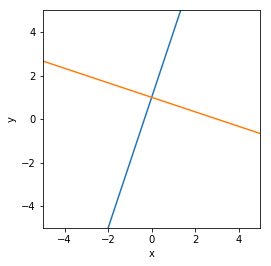

In [237]:
x = np.linspace(-5,5,21)
y = 3*x + 1
y2 = (-1/3)*x + 1
plt.gca().set_aspect('equal')
plt.axis([-5, 5, -5, 5])
plt.plot(x, y)
plt.plot(x, y2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

прямые перпендикулярны, тут проблема в том, что график непропорционально растянут по оси x, поэтому и искажено изображение. Если поправить размерность осей или размер графика, то прямые будут выглядеть перпендикулярными

### 3. Задание

**Задание (в программе)<br>**
**Напишите код на Python, реализующий построение графиков:<br>**
* **окружности,<br>**
* **эллипса,<br>**
* **гиперболы.<br>**

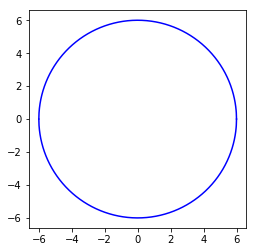

In [243]:
# уравнение окружности (x – x0)^2 + (y – y0)^2 = r^2
r = 6
x = np.linspace(-r,r,1000)
y = np.sqrt(-x**2+r**2)
plt.plot(x, y,'b')
plt.plot(x,-y,'b')
plt.gca().set_aspect('equal')
plt.show()

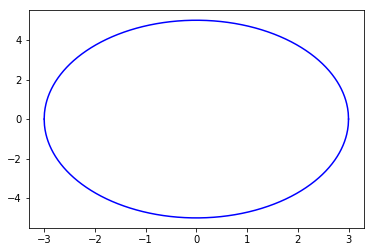

In [245]:
# уравнение эллипса x^2/a^2 + y^2/b^2 = 1
a=3
b=5
x = np.linspace(-a,a,1000)
y = b*np.sqrt(1-(x**2)/(a**2))
plt.plot(x, y,'b')
plt.plot(x,-y,'b')

plt.show()

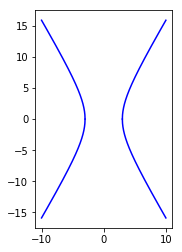

In [261]:
# уравнение гиперболы x^2/a^2 - y^2/b^2 = 1

a=3
b=5
x = np.linspace(3,10,1000)
y = b*np.sqrt((x**2)/(a**2)-1)
plt.plot(x, y,'b')
plt.plot(x,-y,'b')
plt.plot(-x, y,'b')
plt.plot(-x,-y,'b')
plt.gca().set_aspect('equal')

plt.show()

### 4. Задание

**1) Пусть задана плоскость: Ax+By+Cz+D=0** <br>
**Напишите уравнение плоскости, параллельной данной и проходящей через начало координат.**

уравнение плоскости, проходящей через точку x1,y1,z1: <br>
A(x-x1)+B(y-y1)+C(z-z1)=0 <br>

поскольку начало координат это точка 0,0,0, то уравнение будет выглядеть как <br>
Ax+By+Cz=0

**2) Пусть задана плоскость: Ax + By + Cz + D = 0** <br>
**и прямая: (x-x1)/(x2-x1)=(y-y1)/(y2-y1)=(z-z1)/(z2-z1)**<br>
**Как узнать, принадлежит прямая плоскости или нет?**<br>

прямая принадлежит плоскости, если выполняются условия: <br>
Ax1+By1+Cz1=0 <br>
A(x2-x1)+B(y2-y1)+C(z2-z1)=0 <br>

### 5. Задание

**Нарисуйте трехмерный график двух параллельных плоскостей.**

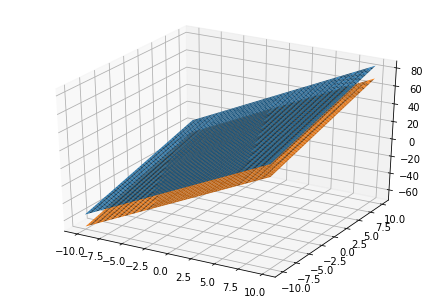

In [103]:
x, y = np.meshgrid(np.arange (-10, 10, 0.1), np.arange (-10, 10, 0.1))

z = 5*x + 2*y+15 
z1 = 5*x + 2*y+1 

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z)
axes.plot_surface(x, y, z1)

pylab.show()

**Нарисуйте трехмерный график двух любых поверхностей второго порядка.**

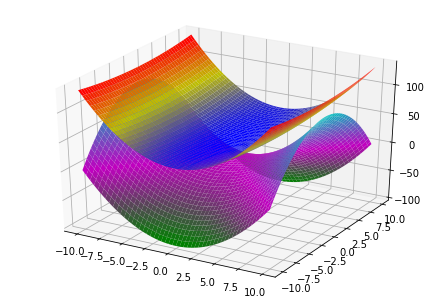

In [125]:
x, y = np.meshgrid(np.arange (-10, 10, 0.1), np.arange (-10, 10, 0.1))

z = (x**2)+(y**2)/10+25
z1 = (x**2)-(y**2)

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z, cmap = LinearSegmentedColormap.from_list ("red_blue", ['b', 'y', 'r'], 256))
axes.plot_surface(x, y, z1, cmap = LinearSegmentedColormap.from_list ("red_blue", ['g', 'm', 'c'], 256))

pylab.show()

## Графики на плоскости

### 1. Задание

**Нарисуйте график функции:** <br>
**y(x) = k∙cos(x – a) + b** <br>
**для некоторых (2-3 различных) значений параметров k, a, b** <br>

In [263]:
def graf(k,a,b):
    x = np.linspace(-10,10,1000)
    y = k*np.cos(x-a)+b
    plt.plot(x, y,'b')
    plt.show()

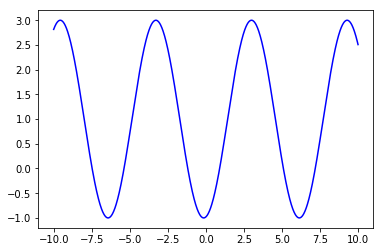

In [264]:
graf (2,3,1)

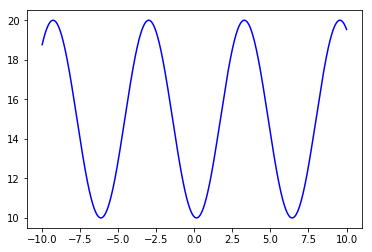

In [265]:
graf (5,-3,15)

### 2. Задание 

***Докажите, что при ортогональном преобразовании сохраняется расстояние между точками.***

In [348]:
# В чем идея, если я правильно поняла:
# задать вектор
# посчитать расстояние между точками
# выполнить ортогональное преобразование вектора
# посчитать расстояние между точками

v = np.array([2,4])
AB = np.sqrt(v[0]**2 + v[1]**2)
print(AB)

a = 1
u = np.array([[np.cos(a), np.sin(a)],[-np.sin(a),np.cos(a)]])
v1 = v*u
v1_ = v1[:,0]+v1[:,1]
# print(v1)
# print(v1_)
AB1 = np.sqrt(v1_[0]**2 + v1_[1]**2)
print(AB1)

4.47213595499958
4.47213595499958


### 3. Задание 

**Напишите код, который будет переводить полярные координаты в декартовы.**

In [317]:
def coord(r,a):
    return (r*np.cos(a), r*np.sin(a))

print(coord(5,2))
print(coord(1,1))

(-2.080734182735712, 4.546487134128409)
(0.5403023058681397, 0.8414709848078965)


**Напишите код, который будет рисовать график окружности в полярных координатах.**

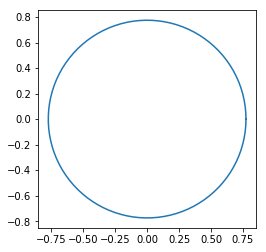

In [129]:
theta = np.linspace(0, 2*np.pi, 100)
r = np.sqrt(0.6)
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.set_aspect(1)
plt.show()

**Напишите код, который будет рисовать график отрезка прямой линии в полярных координатах.**

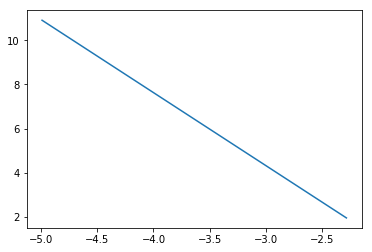

In [161]:
u1 = 2
r1 = 12
x1 = r1*np.cos(u1)
y1 = r1*np.sin(u1)

u2 = 15
r2 = 3
x2 = r2*np.cos(u2)
y2 = r2*np.sin(u2)


# x1,x2,y1,y2
x = np.linspace(x1,x2, 1000)
y = np.linspace(y1,y2, 1000)

fig, ax = plt.subplots(1)
ax.plot(x, y)
plt.show()

### 4. Задание 

**Решите систему уравнений: <br>**
**y = x^2 – 1 <br>**
**exp(x) + x∙(1 – y) = 1 <br>**

In [287]:
def equations(p):
    x, y = p
    return (x**2 - y - 1, math.exp(x) + x*(1-y) - 1)

x, y =  fsolve(equations, (-2, -2))
print(x, y)
x, y =  fsolve(equations, (2, 2))
print(x, y)
x, y =  fsolve(equations, (3, 0))
print(x, y)

-1.5818353528993097 1.5022030836838276
2.6181455730850116 5.854686241864718
4.200105841153755 16.64088907689483


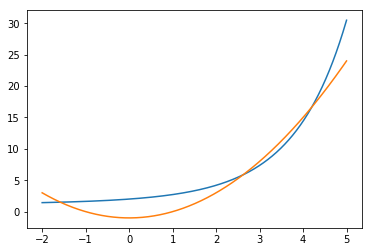

In [280]:
x = np.linspace(-2, 5, 1000)
y = (np.exp(x)+x-1)/x
y1 = x**2-1
plt.plot(x, y)
plt.plot(x, y1)
plt.show()

### 5. Задание

**Решите систему уравнений и неравенств: <br>**
**y = x^2 – 1 <br>**
**exp(x) + x∙(1 – y) > 1 <br>**

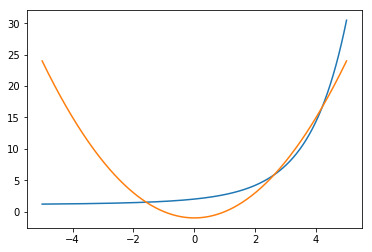

In [291]:
x = np.linspace(-5, 5, 1000)
y = (np.exp(x)+x-1)/x
y1 = x**2-1
plt.plot(x, y)
plt.plot(x, y1)
plt.show()

In [293]:
x1, y1 =  fsolve(equations, (-2, -2))
print(x1, y1)
x2, y2 =  fsolve(equations, (2, 2))
print(x2, y2)
x3, y3 =  fsolve(equations, (3, 0))
print(x3, y3)

-1.5818353528993097 1.5022030836838276
2.6181455730850116 5.854686241864718
4.200105841153755 16.64088907689483


In [298]:
np.exp(x1) + x1*(1 - y1)

1.0000000000208424

In [299]:
np.exp(x2) + x2*(1 - y2)

1.0000000000019522

In [300]:
np.exp(x3) + x3*(1 - y3)

0.9999999999732694

ответ получается (x1,y1) и (x2,y2)